In [ ]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

# Objective**: Understand the relationship between product categories and their best-seller status.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [6]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# 1. **Crosstab Analysis**:
#    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
#    - Are there categories where being a best-seller is more prevalent? 
    	
#    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [18]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
df.groupby('category').size()

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Length: 296, dtype: int64

In [16]:
bestseller_count = df.groupby('category')['isBestSeller'].sum()
bestseller_count_sorted = bestseller_count.sort_values(ascending=False)
bestseller_count_sorted

category
Grocery                        556
Health & Personal Care         552
Baby                           341
Sports & Outdoors              330
Power & Hand Tools             306
                              ... 
Downhill Ski Boots               0
Digital Frames                   0
Motorbike Chassis                0
Motorbike Drive & Gears          0
eBook Readers & Accessories      0
Name: isBestSeller, Length: 296, dtype: int64

In [ ]:
#2. **Statistical Tests**:
 #   - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
  #  - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [23]:
from scipy.stats import chi2_contingency

# Chi-square test for 'categort' and 'isBestSeller'
_ , chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_p_value

0.0

In [26]:
chi2, p, dof, expected = chi2_contingency(crosstab)

chi2, p, dof, expected

(36540.20270061387,
 0.0,
 295,
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6.69449115e-01],
  

In [27]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab' using the "cramer" method
association(crosstab, method="cramer")

0.1222829439760564

In [ ]:
# the association between 2 vars is low.

In [ ]:
#3. **Visualizations**:
#	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

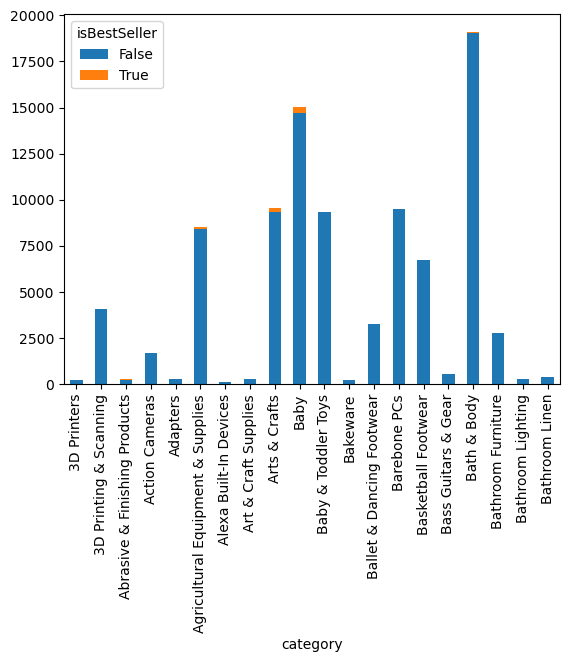

In [47]:
crosstab.head(20).plot(kind="bar", stacked=True)
plt.show()

In [ ]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# **Objective**: Investigate how different product categories influence product prices.

In [ ]:
# 0. **Preliminary Step: Remove outliers in product prices.**

#	For this purpose, we can use the IQR (Interquartile Range) method. 
# Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
# The next steps will be done with the dataframe without outliers.
	
#	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [34]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [35]:
data_price = df['price']
outliers = tukeys_test_outliers(data_price)
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [39]:
outliers_indices = outliers.index
df_without_outliers = df.drop(index = outliers_indices)


In [ ]:
# 1. **Violin Plots**:
  #  - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
   # - Which product category tends to have the highest median price? Don't filter here by top categories.

In [52]:
ctop_20_cat = df_without_outliers['category'].value_counts().head(10).index
df_top_20 = df_without_outliers[df_without_outliers['category'].isin(ctop_20_cat)]

C:\Users\igrav\AppData\Local\Temp\ipykernel_13640\250484183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= df_top_20, x='category', y='price', palette="coolwarm")


<Figure size 4000x1000 with 0 Axes>

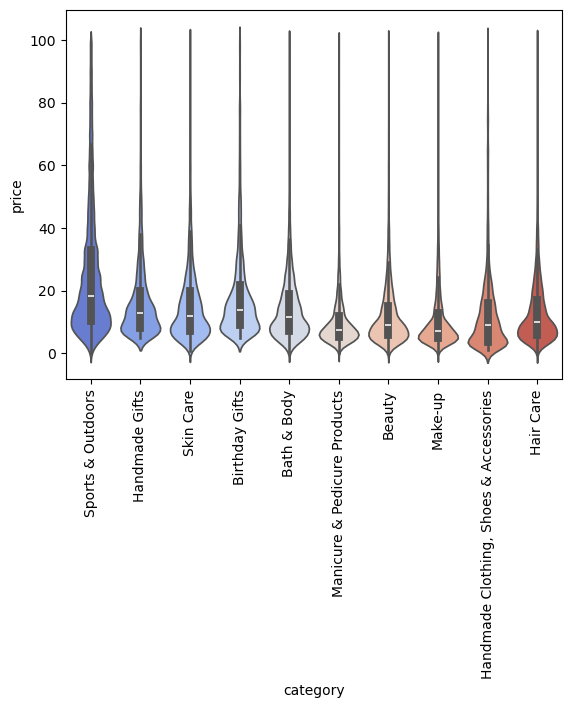

<Figure size 4000x1000 with 0 Axes>

In [57]:
sns.violinplot(data= df_top_20, x='category', y='price', palette="coolwarm")

plt.xticks(rotation = 90)
plt.figure(figsize=(40, 10))

C:\Users\igrav\AppData\Local\Temp\ipykernel_13640\3058168130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= df_top_20, x='category', y='price', palette="coolwarm")


<Figure size 4000x1000 with 0 Axes>

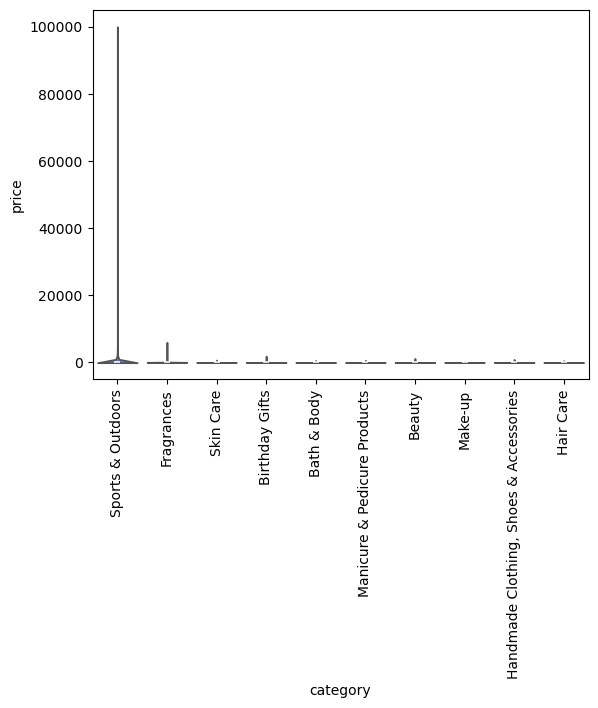

<Figure size 4000x1000 with 0 Axes>

In [90]:
ctop_20_cat = df['category'].value_counts().head(10).index
df_top_20 = df[df['category'].isin(ctop_20_cat)]

sns.violinplot(data= df_top_20, x='category', y='price', palette="coolwarm")

plt.xticks(rotation = 90)
plt.figure(figsize=(40, 10))

In [ ]:
# Which product category tends to have the highest median price? - Sports and Outdoors

In [ ]:
# 2. **Bar Charts**:
  #  - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
   # - Which product category commands the highest average price? Don't filter here by top categories.

In [63]:
ctop_10_cat = df_without_outliers['category'].value_counts().head(10).index
df_top_10 = df_without_outliers[df_without_outliers['category'].isin(ctop_10_cat)]

mean_price = df_top_10.groupby('category')['price'].agg('mean')

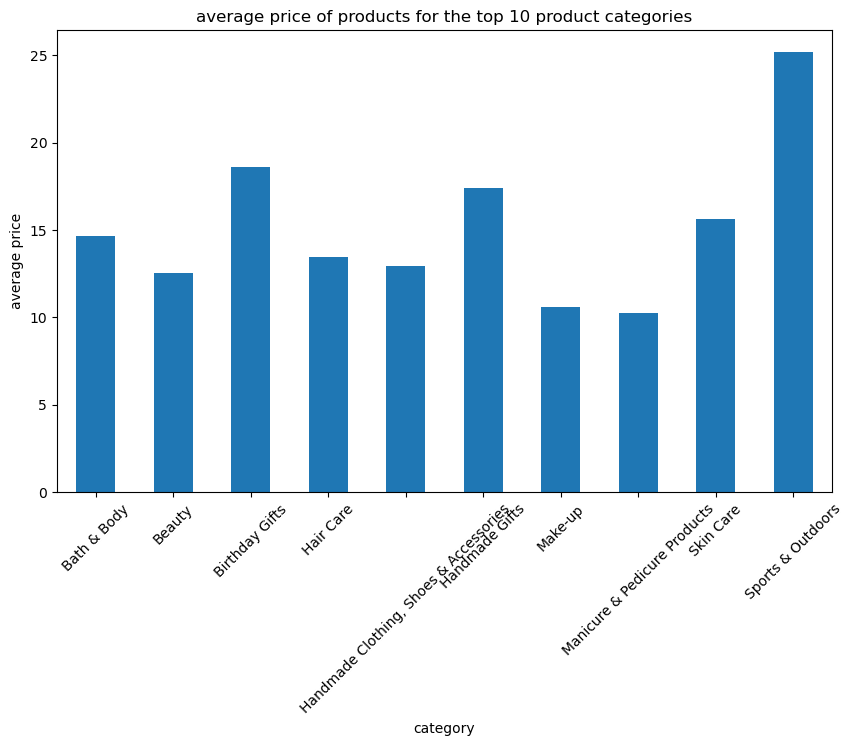

In [65]:
# Plotting the bar chart
plt.figure(figsize= (10, 6))
mean_price.plot(kind = 'bar')
plt.title('average price of products for the top 10 product categories')
plt.xlabel('category')
plt.ylabel('average price')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Which product category commands the highest average price? Don't filter here by top categories. - Sports and Outdoors

In [ ]:
# 3. **Box Plots**:
  #  - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
  # Filter out the top 10 categories based on count for better visualization.
   # - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [ ]:
top_10_cat = df_without_outliers['category'].value_counts().head(10).index
df_top_10 = df_without_outliers[df_without_outliers['category'].isin(top_10_cat)]


C:\Users\igrav\AppData\Local\Temp\ipykernel_13640\3621192922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='category', y='stars', palette="coolwarm")


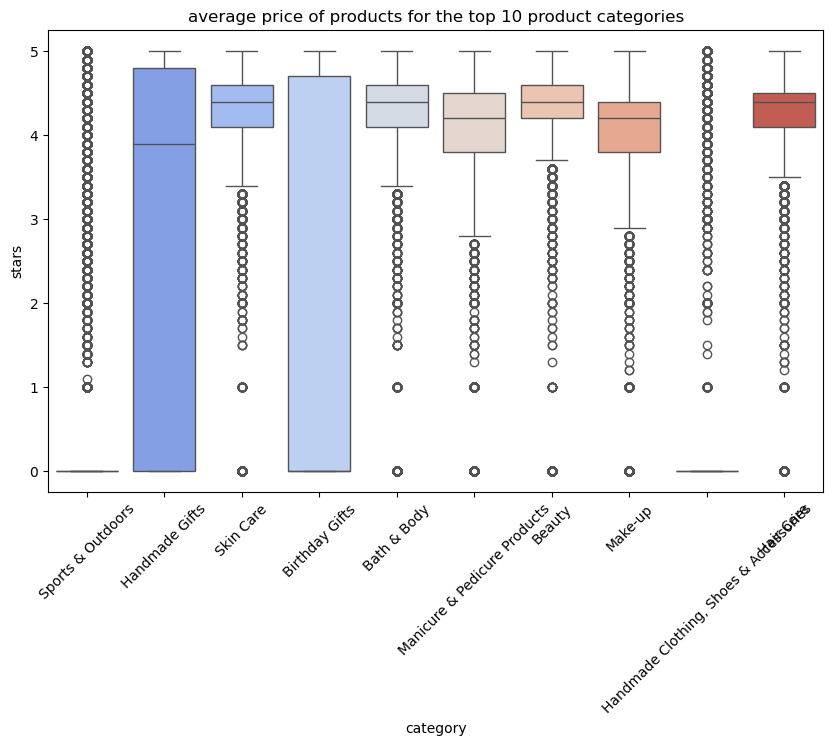

In [72]:
plt.figure(figsize= (10, 6))
sns.boxplot(data=df_top_10, x='category', y='stars', palette="coolwarm")
plt.title('average price of products for the top 10 product categories')
plt.xticks(rotation = 45)
plt.show()

C:\Users\igrav\AppData\Local\Temp\ipykernel_13640\1400784940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='category', y='stars', palette="coolwarm")


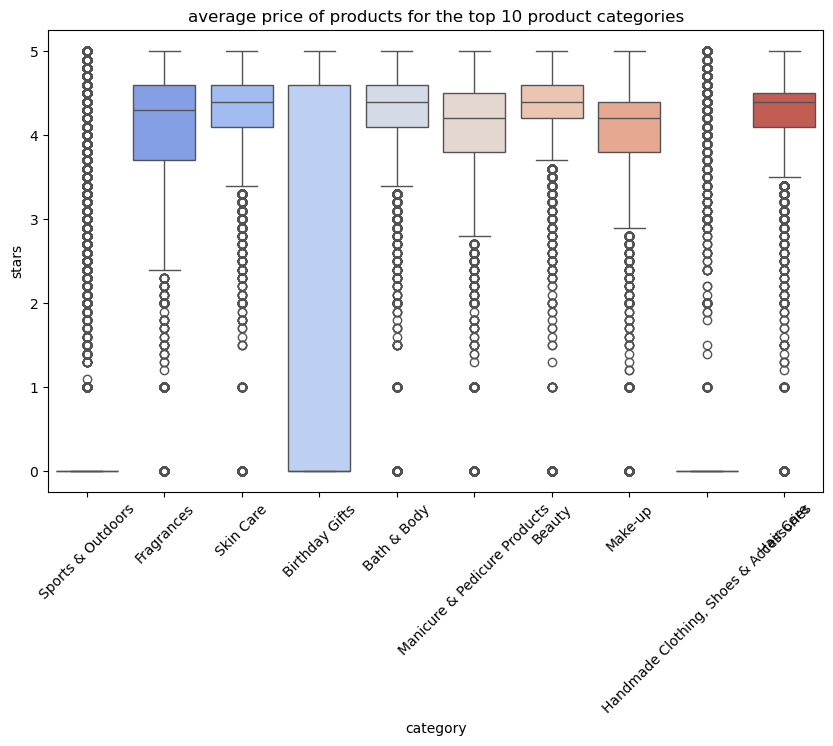

In [91]:
top_10_cat = df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_cat)]


plt.figure(figsize= (10, 6))
sns.boxplot(data=df_top_10, x='category', y='stars', palette="coolwarm")
plt.title('average price of products for the top 10 product categories')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
 # - Which category tends to receive the highest median rating from customers? Don't filter here by top categories. - Skin Care

In [ ]:
df_without_outliers

In [ ]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings
## **Objective**: Analyze how product ratings (`stars`) correlate with product prices.

In [ ]:
## 1. **Correlation Coefficients**:
   ## - Calculate the correlation coefficient between `price` and `stars`.
   ## - Is there a significant correlation between product price and its rating? 

In [73]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df_without_outliers['price'].corr(df_without_outliers['stars'])
correlation

-0.0776729987818137

In [74]:
# Calculating the Spearman correlation coefficient between 'price' and 'stars' columns
correlation = df_without_outliers['price'].corr(df_without_outliers['stars'], method = 'spearman')
correlation

-0.06679697280768314

In [ ]:
 ## - Is there a significant correlation between product price and its rating?  - I was thinking correlation suposed to be possitive, 
 # but as we can see it is negative but not very strong.
 # Pearson = 8%, Spearman = 7%

In [ ]:
# 2. **Visualizations**:
  #  - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
  #  - Use a correlation heatmap to visualize correlations between all numerical variables.
  #  - Examine if product prices typically follow a normal distribution using a QQ plot. 

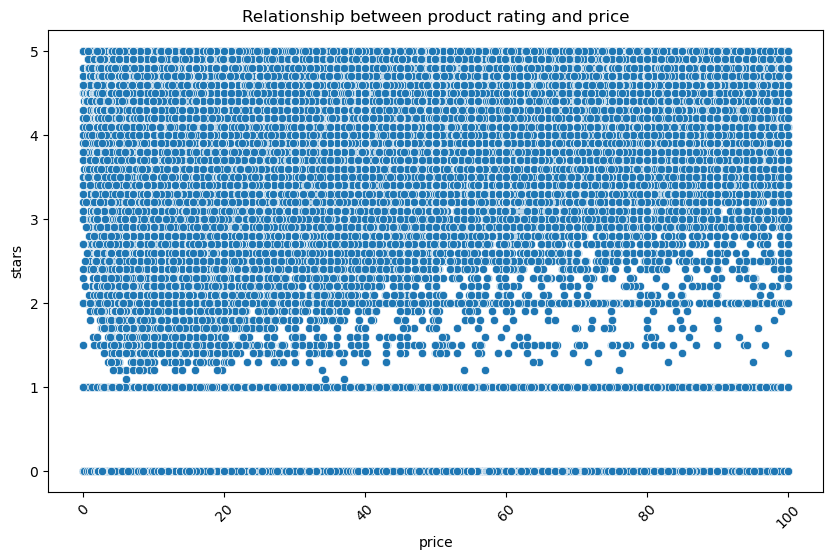

In [78]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_without_outliers, x='price', y='stars')
plt.title('Relationship between product rating and price')
plt.xticks(rotation = 45)
plt.show()

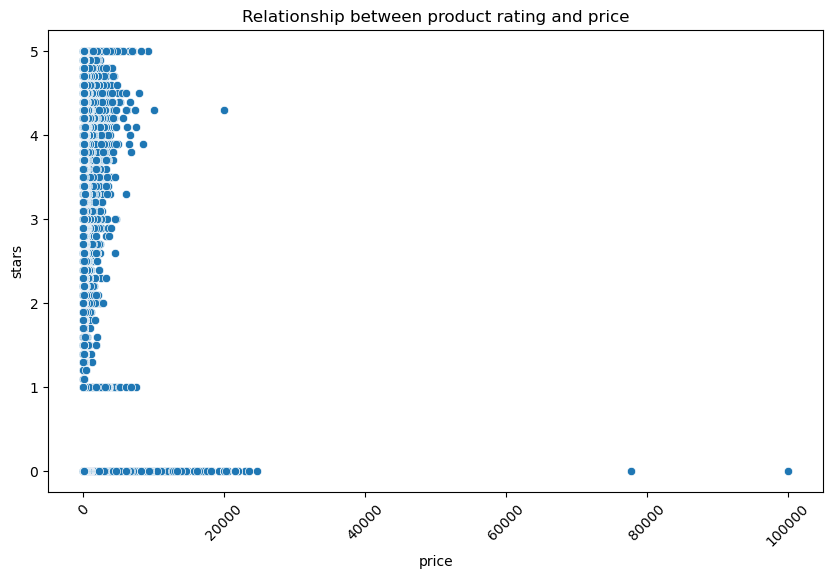

In [92]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x='price', y='stars')
plt.title('Relationship between product rating and price')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
 #  - Use a correlation heatmap to visualize correlations between all numerical variables.

In [ ]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df_without_outliers.select_dtypes("number").loc[:, df_without_outliers.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

In [82]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df_without_outliers.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df_without_outliers.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

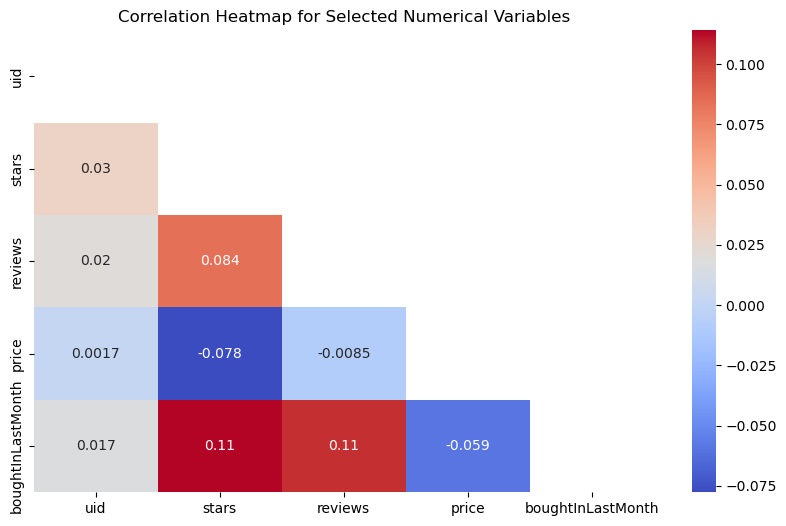

In [87]:
correlation_matrix = df_numerical.corr() 
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool) )

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask = mask)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
#  - Examine if product prices typically follow a normal distribution using a QQ plot.

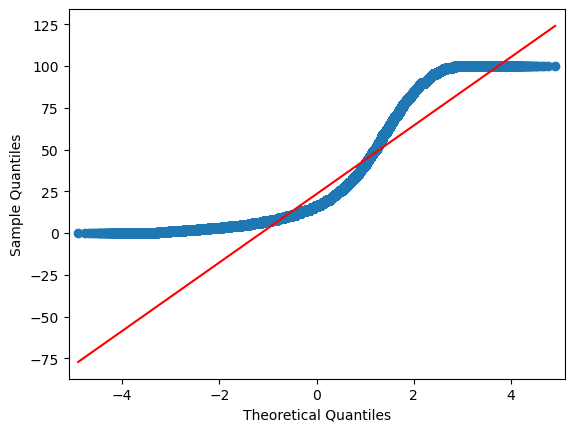

In [88]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_without_outliers['price'], line='s');

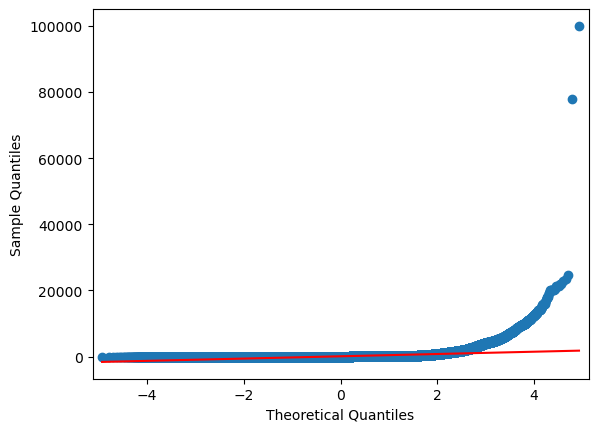

In [93]:
sm.qqplot(df['price'], line='s');